In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report, mean_squared_error, accuracy_score, confusion_matrix, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import MeanSquaredError, MeanAbsoluteError
from xgboost import XGBRegressor, XGBClassifier

In [2]:
df = pd.read_csv(r"C:\Users\smith\Data_analysis\data\Data3.csv")  
logged = pd.read_csv(r"C:\Users\smith\Data_analysis\data\Data_logged.csv")
df = df.drop("Unnamed: 0", axis=1)
logged = logged.drop("Unnamed: 0", axis=1)


In [3]:
#predicting avg_d_kbps using multi regression in sci-kit learn

x = logged.drop("avg_d_kbps", axis=1)
y = logged["avg_d_kbps"]

#scale the data 
scaler = StandardScaler()
x = scaler.fit_transform(x)

# split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# initialize and train the multi regression model
regressor = LinearRegression()
regressor.fit(x_train, y_train)

# predict and evaluate the multi regression model
y_pred = regressor.predict(x_test)
#unlog the values to get better scope of accuracy 
y_test_unlog = np.exp(y_test)
y_pred_unlog = np.exp(y_pred)
mse = mean_squared_error(y_test_unlog, y_pred_unlog)
r_squared = r2_score(y_test_unlog, y_pred_unlog)

#print results 
print("Regression Mean Squared Error:", mse)
print("R2" , r_squared )

Regression Mean Squared Error: 3491571169.103506
R2 0.7079585387023524


In [4]:
#xgbreggressor model for multi regression on predicted download speed

x = logged.drop("avg_d_kbps", axis=1)
y = logged["avg_d_kbps"]

#scale the data 
scaler = StandardScaler()
x = scaler.fit_transform(x)
#split into test and train 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15)
xgbr = XGBRegressor(verbosity=0)




In [5]:
#fit model 
xgbr.fit(x_train, y_train)
y_pred_xgbr = xgbr.predict(x_test)

#unlog to show better scope of accuracy 
y_test_xgbr_unlog = np.exp(y_test)
y_pred_xgbr_unlog = np.exp(y_pred_xgbr)
mse = mean_squared_error(y_test_xgbr_unlog, y_pred_xgbr_unlog)
r_squared = r2_score(y_test_xgbr_unlog, y_pred_xgbr_unlog)

#print accuracy
print("Regression Mean Squared Error:", mse)
print("R2" , r_squared )

#find coefs and display them to show relationshsips
df_coef = logged.drop("avg_d_kbps", axis=1)
feature_coef = xgbr.feature_importances_
col_names = df_coef.columns.tolist()
coef_df = pd.DataFrame({"Feature": col_names, "coef": feature_coef})
coef_df


Regression Mean Squared Error: 950255870.1120667
R2 0.9185331844129492


,Feature,coef
0,avg_u_kbps,0.615744
1,avg_lat_ms,0.007557
2,avg_lat_down_ms,0.004935
3,avg_lat_up_ms,0.007457
4,speed_ratio,0.357212
5,latency_ratio,0.007094


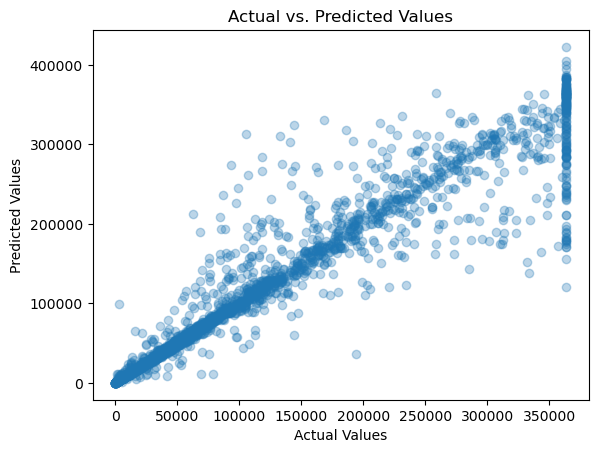

In [6]:
#scatter plot between actual and predicted data

plt.scatter(y_test_xgbr_unlog, y_pred_xgbr_unlog, alpha=0.3)
plt.title("Actual vs. Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

In [7]:
#using neural network to predict avg_d_kbps.  https://www.youtube.com/watch?v=6_2hzRopPbQ&t=334s


x = logged.drop("avg_d_kbps", axis=1)
y = logged["avg_d_kbps"]

#split into test and train 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#scaled and fit the training data 
scaler_NN = StandardScaler()
scaler_NN.fit(x_train)

# transform the training and testing data
x_train_scaled = scaler_NN.transform(x_train)
x_test_scaled = scaler_NN.transform(x_test)

#creating NN model
model = Sequential()
model.add(Dense(units=64, activation="relu", input_shape=(x_train_scaled.shape[1],)))
model.add(Dense(units=32, activation="relu"))
model.add(Dense(units=1)) 

model.compile(optimizer="adam", loss="mse")

#train the model
model.fit(x_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

# predict and evaluate the model
y_pred_NN = model.predict(x_test_scaled)

#unlog data to show clear scope of accuracy
y_test_NN_unlog = np.exp(y_test)
y_pred_NN_unlog = np.exp(y_pred_NN)
mse = mean_squared_error(y_test_NN_unlog, y_pred_NN_unlog)
r_squared = r2_score(y_test_NN_unlog, y_pred_NN_unlog)

#print out accuracy metrics 
print("Regression Mean Squared Error:", mse)
print("R2" , r_squared )
mse = mean_squared_error(y_test_NN_unlog, y_pred_NN_unlog)
print("MSE:", mse)

Epoch 1/50
400/400 [==============================] - 4s 5ms/step - loss: 20.6555 - val_loss: 2.5714
Epoch 2/50
400/400 [==============================] - 2s 4ms/step - loss: 1.3129 - val_loss: 0.5336
Epoch 3/50
400/400 [==============================] - 1s 4ms/step - loss: 0.2974 - val_loss: 0.1832
Epoch 4/50
400/400 [==============================] - 2s 4ms/step - loss: 0.1408 - val_loss: 0.1325
Epoch 5/50
400/400 [==============================] - 2s 4ms/step - loss: 0.1102 - val_loss: 0.1035
Epoch 6/50
400/400 [==============================] - 1s 4ms/step - loss: 0.0996 - val_loss: 0.1071
Epoch 7/50
400/400 [==============================] - 1s 4ms/step - loss: 0.0948 - val_loss: 0.0926
Epoch 8/50
400/400 [==============================] - 2s 4ms/step - loss: 0.0930 - val_loss: 0.0907
Epoch 9/50
400/400 [==============================] - 2s 4ms/step - loss: 0.0889 - val_loss: 0.0855
Epoch 10/50
400/400 [==============================] - 1s 4ms/step - loss: 0.0871 - val_loss: 0.083

In [8]:
#predicting net_type_fixed or mobile with scikit-learn Descision tree classification
X = df.drop(columns=["net_type_fixed", "net_type_mobile"])
y = df["net_type_fixed"]

#split into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#scaled the data 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#create and fit model
classifier = RandomForestClassifier(n_estimators = 10, criterion = "entropy", random_state = 0)
classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test)

#performance reports
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

#print accuracy 
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)



Accuracy: 0.8645
Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.91      0.87      1994
         1.0       0.91      0.81      0.86      2006

    accuracy                           0.86      4000
   macro avg       0.87      0.86      0.86      4000
weighted avg       0.87      0.86      0.86      4000



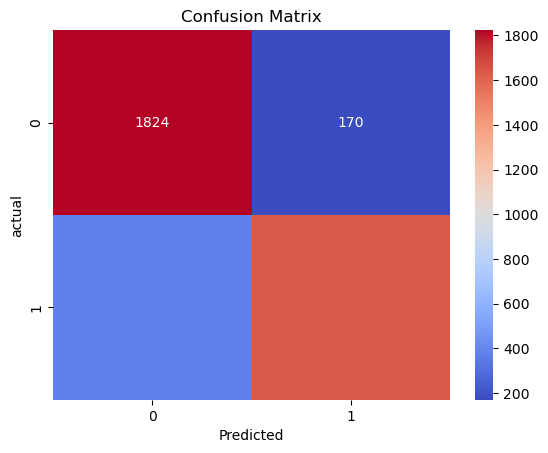

In [9]:
#showing the confusion matrix of the classification model , in my tensorflow enviroment not all values are shown 
matrix = confusion_matrix(y_test, y_pred) 

sns.heatmap(matrix, annot=True, fmt="d", cmap="coolwarm")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("actual")
plt.show()

In [10]:
#predicting network type using XGBClassification model

x = df.drop(columns=["net_type_fixed", "net_type_mobile"])
y = df["net_type_fixed"]

#split into test and train sets 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#scale the data 
sc = StandardScaler()
x_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)

#create and fit model
class_xgbc = XGBClassifier(eval_metric="logloss")
class_xgbc.fit(X_train, y_train)
y_pred_xgbc = class_xgbc.predict(X_test)

#printing accuracy of the model
accuracy = accuracy_score(y_test, y_pred_xgbc)
report = classification_report(y_test, y_pred_xgbc)
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

Accuracy: 0.8695
Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.90      0.87      1994
         1.0       0.90      0.84      0.87      2006

    accuracy                           0.87      4000
   macro avg       0.87      0.87      0.87      4000
weighted avg       0.87      0.87      0.87      4000



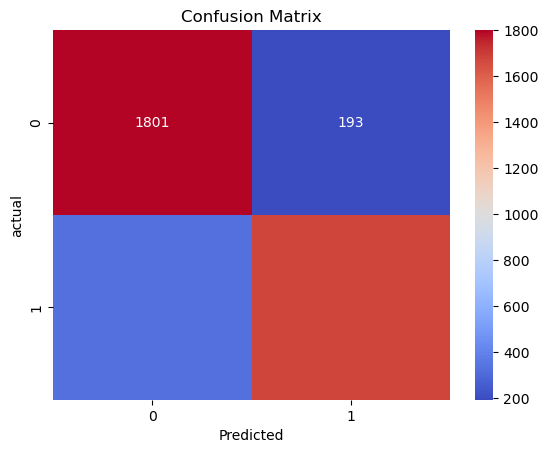

In [11]:
#showing the confusion matrix of the XGBClasiifcation model , in my tensorflow enviroment not all values are shown 

matrix = confusion_matrix(y_test, y_pred_xgbc) 

sns.heatmap(matrix, annot=True, fmt="d", cmap="coolwarm")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("actual")
plt.show()